In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


We have data on 500 subscribers of the "Megaline" mobile network operator, including data on calls, text messages and internet usage. There is also a table with data about users ("users"). The data in these tables is linked to the column "user_id". The data about the operator's tariffs is presented in the table "tariffs" and is connected through the column "tariff_name" with the column "tariff" in the table "users". 

The purpose of our research: to analyze the customer behavior of both tariffs and, based on the analysis, draw a conclusion about which tariff has more revenue, and, accordingly, which tariff is worth to promote in the marketing campaign. 
To do this you need to:
- prepare the data for processing - bring the column data types in order, and check the data for missing and null values, round up the data where required, etc.
- create a summary data table to analyze all indicators by subscribers and periods
- comparative analysis of data for tariff plans by calculating additional indicators and data visualization
- to formulate and check the hypotheses
- draw conclusions and make recommendations regarding the results of the analysis


# Data preparation

In [45]:
print(calls.info())
print()
# Checking for missing values or duplicates
print(calls.isna().sum()) 
print()
print(calls.duplicated().sum())
print()
# Rounding up the call duration figures
calls['duration'] = calls['duration'].apply(np.ceil)
# Rounding up Internet traffic figures
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

id           0
call_date    0
duration     0
user_id      0
dtype: int64

0



In [46]:
# data type replacement
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['duration'] = calls['duration'].astype('int')
internet['mb_used'] = internet['mb_used'].astype('int')

In [47]:
# replacement 0.00 at duration
calls = calls[calls['duration'] != 0] 

In the "calls" table in the "duration" column, there are rows with call duration equal to - 0.0. Such data are incorrect, for further optimization of work with this table it makes sense to delete such lines.
In the column "duration" according to the conditions of the operator we need to round up the duration of calls (for example, if the duration is 0.01, we round up to 1). The same is true for the consumption of Internet traffic (column "mb_used" in the table "internet"). After rounding the data up, it makes sense to change the type of columns to integer, because now they are integer data.
Also we changed the type of column "call_date" from object to datetime, since we work with the date on this column.

In [48]:
print(internet.info())
print()
# Checking for missing values or duplicates
print(internet.isna().sum())
print()
print(internet.duplicated().sum())
# Rounding up the call duration figures
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: int64(2), object(2)
memory usage: 4.6+ MB
None

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

0


In [49]:
# data type replacement
internet['session_date'] = pd.to_datetime(internet['session_date'])

In the column "internet" according to the conditions of the operator we must round up the amount of traffic used (for example, if the duration is 0.01 mb, we round up to 1 mb)
Also we changed the "session_date" column type from object to datetime, because we are working with the date in this column

In [50]:
print(messages.info())
print()
# Checking for missing values or duplicates
print(messages.isna().sum())
print()
print(messages.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

id              0
message_date    0
user_id         0
dtype: int64

0


In [51]:
# data type replacement
messages['message_date'] = pd.to_datetime(messages['message_date'])

We replaced the "message_date" column type from object to datetime, since we work with the date in this column

In [52]:
print(tariffs.info())
# add a column to calculate the gigabytes included in each tariff
tariffs['gb_per_month_included'] = tariffs['mg_per_month_included'] / 1024

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [53]:
print(users.info())
# Checking for missing values or duplicates
print(users.isna().sum())
print()
print(users.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

0


In [54]:
# data type replacement
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In the "churn_date" column, we found 462 missing values. By convention, such omissions mean that the tariff was still valid at the time of data unloading. In this case, it is better to leave such omissions and not to replace or delete them. 
We replaced the types of columns: "reg_date" and "churn_date" with object to datetime, because we work with the date for these columns

# Forming a table to calculate the indicators by months for each client

In [55]:
# create columns by month only
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month
# create a table where we link the calls and users tables
calls = pd.merge(calls, users.loc[:,['tariff', 'user_id', 'city']], on='user_id', how='right')
# for each user by month the number of calls made
users_calls_counts = calls.groupby(['user_id','month']).agg(tariff=pd.NamedAgg(column='tariff', aggfunc='first'),
                                                            city=pd.NamedAgg(column='city', aggfunc='first'),
                                                            call_amount=pd.NamedAgg(column='id', aggfunc='count'),
                                                            call_duration=pd.NamedAgg(column='duration', aggfunc=sum))
# for each user by month the number of messages sent
users_messages_counts = messages.groupby(['user_id','month']).agg(msg_send=pd.NamedAgg(column='id', aggfunc='count'))
# for each user by month the amount of Internet traffic spent
users_internet_counts = internet.groupby(['user_id','month'])['mb_used'].sum()
# create a sheet of grouped table names 
users_counts = [users_calls_counts,users_messages_counts,users_internet_counts]
# create a final table where we merge the tables that were grouped together before
result = pd.concat(users_counts,axis=1)
# add a new column with spent gigabytes of traffic for each client
result['gb_used'] = result['mb_used'] / 1024
# function to calculate the excess by tariffs of the duration of calls                   
def calls_over_plan(row):
    if row['tariff'] == 'smart':
        result = row['call_duration'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['call_duration'] - 3000
        return np.where(result > 0, result, 0)
# add a new column with the exceeded limit to the final table    
result['calls_over_plan'] = result.apply(calls_over_plan, axis=1)
# function to calculate the excess by tariffs of the number of messages sent 
def msg_over_plan(row):
    if row['tariff'] == 'smart':
        result = row['msg_send'] - 50
        return np.where(result > 0, result, 0)
    else:
        result = row['msg_send'] - 1000
        return np.where(result > 0, result, 0)
# add a new column with the exceeded limit to the final table     
result['msg_over_plan'] = result.apply(msg_over_plan, axis=1)    
# function to calculate the excess by tariffs of spent Internet traffic in gigabytes  
def gb_over_plan(row):
    if row['tariff'] == 'smart':
        result = row['gb_used'] - 15
        return np.where(result > 0, result, 0)
    else:
        result = row['gb_used'] - 30
        return np.where(result > 0, result, 0)
# add a new column with the exceeded limit to the final table     
result['gb_over_plan'] = result.apply(gb_over_plan, axis=1)    
# function for monetary calculation of exceeding the limit and mandatory monthly payment 
def total_income(row):
    if row['tariff'] == 'smart':
        result = 550 + row['calls_over_plan'] * 3 + row['msg_over_plan'] * 3 + row['gb_over_plan'] * 200 
        return np.where(result > 0, result, 0)
    else:
        result = 1950 + row['calls_over_plan'] * 1 + row['msg_over_plan'] * 1 + row['gb_over_plan'] * 150 
        return np.where(result > 0, result, 0)
# let's add a new column with the monetary value of exceeding the limit and the mandatory monthly payment to the final table      
result['total_income'] = result.apply(total_income, axis=1).astype('int')
print(result)

              tariff         city  call_amount  call_duration  msg_send  \
user_id month                                                             
1000    5.0    ultra    Краснодар         17.0          159.0      22.0   
        6.0    ultra    Краснодар         28.0          172.0      60.0   
        7.0    ultra    Краснодар         41.0          340.0      75.0   
        8.0    ultra    Краснодар         42.0          408.0      81.0   
        9.0    ultra    Краснодар         46.0          466.0      57.0   
...              ...          ...          ...            ...       ...   
1498    10.0   smart  Владикавказ         30.0          247.0      42.0   
1499    9.0    smart        Пермь          8.0           70.0      11.0   
        10.0   smart        Пермь         44.0          449.0      48.0   
        11.0   smart        Пермь         62.0          612.0      59.0   
        12.0   smart        Пермь         56.0          492.0      66.0   

               mb_used  

In [56]:
result

tariff         city  call_amount  call_duration  msg_send  \
user_id month                                                             
1000    5.0    ultra    Краснодар         17.0          159.0      22.0   
        6.0    ultra    Краснодар         28.0          172.0      60.0   
        7.0    ultra    Краснодар         41.0          340.0      75.0   
        8.0    ultra    Краснодар         42.0          408.0      81.0   
        9.0    ultra    Краснодар         46.0          466.0      57.0   
...              ...          ...          ...            ...       ...   
1498    10.0   smart  Владикавказ         30.0          247.0      42.0   
1499    9.0    smart        Пермь          8.0           70.0      11.0   
        10.0   smart        Пермь         44.0          449.0      48.0   
        11.0   smart        Пермь         62.0          612.0      59.0   
        12.0   smart        Пермь         56.0          492.0      66.0   

               mb_used    gb_used calls_over_plan msg_over_plan  gb_over_plan  \
user_id month                                                                   
1000    5.0     2256.0   2.203125             0.0           0.0           0.0   
        6.0    23257.0  22.711914             0.0           0.0           0.0   
        7.0    14016.0  13.687500             0.0           0.0           0.0   
        8.0    14070.0  13.740234             0.0           0.0           0.0   
        9.0    14581.0  14.239258             0.0           0.0           0.0   
...                ...        ...             ...           ...           ...   
1498    10.0   20604.0  20.121094             0.0           0.0    5.12109375   
1499    9.0     1848.0   1.804688             0.0           0.0           0.0   
        10.0   17809.0  17.391602             0.0           0.0  2.3916015625   
        11.0   17984.0  17.562500           112.0           9.0        2.5625   
        12.0   13077.0  12.770508             0.0          16.0           0.0   

               total_income  
user_id month                
1000    5.0            1950  
        6.0            1950  
        7.0            1950  
        8.0            1950  
        9.0            1950  
...                     ...  
1498    10.0           1574  
1499    9.0             550  
        10.0           1028  
        11.0           1425  
        12.0            598  

[3214 rows x 11 columns]

To analyze the monthly revenue from each user, we need to create a summary table by tariff conditions. Among the original five tables is a common column with an individual customer id number. We will use it to form the table. Pay attention that we form a table by months for each client, because there are clients whose contract has already expired, and it is relevant to count exactly the costs by month. 

# Analysis of the generated table to calculate the indicators for tariff plans

In [57]:
# generate the table only for the "Ultra" tariff
tariff_ultra = result.query('tariff == "ultra"')
# duration of calls among Ultra tariff subscribers
tariff_ultra_duration_mean = tariff_ultra['call_duration']
# number of messages among Ultra tariff subscribers
tariff_ultra_msg_mean = tariff_ultra['msg_send']
# internet traffic among Ultra subscribers
tariff_ultra_gb_mean = tariff_ultra['gb_used']
# vocabulary from the data collected up to this point
tariff_ultra_mean = [{"name": "call duration", "table":tariff_ultra_duration_mean}, 
                     {"name": "message amount", "table":tariff_ultra_msg_mean}, 
                     {"name": "internet traffic", "table":tariff_ultra_gb_mean}]
# calculation of the mean, variance, and standard deviation
for element in tariff_ultra_mean:
    print("Average", element['name'],' = ',element["table"].mean())
    print('Standard deviation of', element['name'],' = ',element['table'].std())
    print('Variance of', element['name'], ' = ',element['table'].var())
    print()

Average call duration  =  547.7550158394931
Standard deviation of call duration  =  305.5133847991131
Variance of call duration  =  93338.42829141095

Average message amount  =  60.83662714097497
Standard deviation of message amount  =  44.43696050354379
Variance of message amount  =  1974.6434587935105

Average internet traffic  =  19.236009204909283
Standard deviation of internet traffic  =  9.753696138483857
Variance of internet traffic  =  95.1345883618749



In [58]:
# расчет среднего значения, дисперсии и стандартного отклонения
tariff_smart = result.query('tariff == "smart"')
# duration of calls among "Smart" tariff subscribers
tariff_smart_duration_mean = tariff_smart['call_duration']
# number of messages among "Smart" tariff subscribers
tariff_smart_msg_mean = tariff_smart['msg_send']
# internet traffic among Smart subscribers
tariff_smart_gb_mean = tariff_smart['gb_used']
# vocabulary from the data collected up to this point
tariff_smart_mean = [{"name": "call duration", "table":tariff_smart_duration_mean}, 
                     {"name": "message amount", "table":tariff_smart_msg_mean}, 
                     {"name": "internet traffic", "table":tariff_smart_gb_mean}]
# calculation of the mean, variance, and standard dev
for element in tariff_smart_mean:
    print("Average", element['name'],' = ',element["table"].mean())
    print('Standard deviation of', element['name'],' = ',element['table'].std())
    print('Variance of', element['name'], ' = ',element['table'].var())
    print()

Average call duration  =  419.4403421882035
Standard deviation of call duration  =  188.99240337626512
Variance of call duration  =  35718.128533936906

Average message amount  =  38.74817136886102
Standard deviation of message amount  =  26.829451273168758
Variance of message amount  =  719.8194556193367

Average internet traffic  =  15.858177611204955
Standard deviation of internet traffic  =  5.736984007428575
Variance of internet traffic  =  32.91298550149123



Comparing the average figures for the two tariffs, we can conclude that the average duration of calls per month does not exceed the limit conditions of the tariff. So in the "Ultra" tariff the average indicator is 548 minutes at the limit of 3,000. In "Smart" - 419 minutes at 500 minutes per month limit. However, it is worth noting the extremely high standard deviation (306 and 189), which indicates a high dispersion of random values relative to the mathematical expectation in both tariffs.
As for the messages sent on average per month, the dispersion is also large in relation to the amount of service used, while the average value is much lower than the stated limit. In the Ultra tariff it is 61 messages per month with a limit of 1,000 messages, in the Smart tariff it is 39 messages with a limit of 50. We see the unpopularity of using this option among clients.
As for the Internet traffic, there is an important observation. The average amount of Internet traffic per month in the "Smart" tariff exceeds the established limit a little bit (15.9 gb with a limit of 15 gb), with a standard deviation of 5.7 gb. We can conclude that customers almost always exceed the limit of traffic per month, and pay more than the limit, which brings additional revenue for this tariff. In the Ultra tariff the average traffic is 19.2 gb with a limit of 30 gb, and the standard deviation is 9.8 gb. A high monthly limit is set here, so as a rule, there is no additional revenue within the Ultra tariff for this service. 

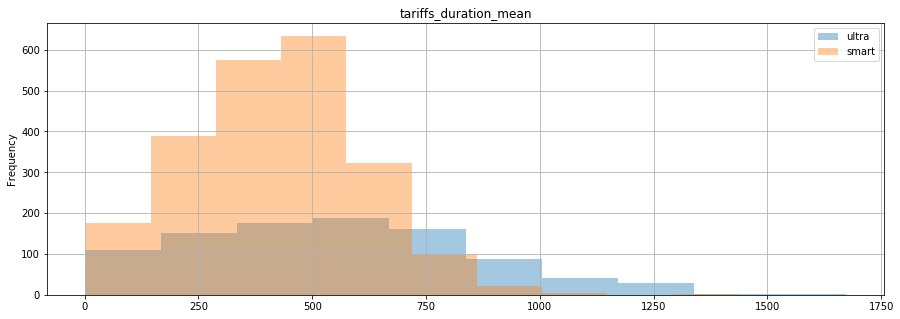

In [59]:
# dictionary of two tariffs and average duration of calls per month
tariffs_duration_mean = [{"name": "call duration", "table":tariff_ultra_duration_mean},
                         {"name": "call duration", "table":tariff_smart_duration_mean}]
# chart of the two rates and the average duration of calls per month
for element in tariffs_duration_mean:
    element['table'].plot(grid=True,figsize=(15,5),title='tariffs_duration_mean',kind='hist',alpha=0.4)
    plt.legend(['ultra','smart'])

A significant number of "Smart" tariff subscribers use at least half of the limit for the duration of their calls, while a significant number of subscribers fully use up or exceed this limit. In contrast, Ultra tariff subscribers actually do not exceed the set limit of 3,000 minutes. Also, in both cases there is a generally normal distribution of data without obvious slopes.

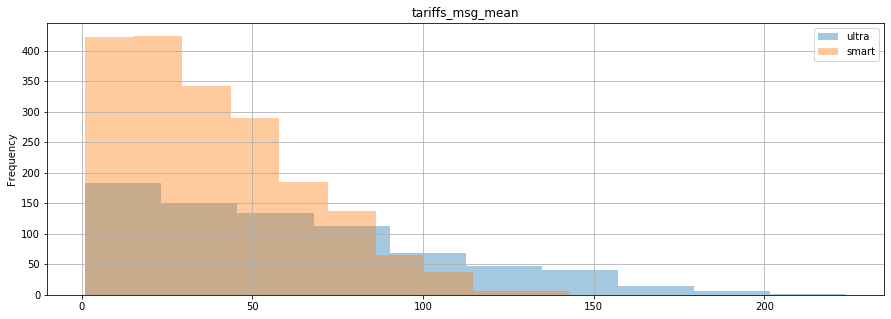

In [60]:
# dictionary by two rates and average number of messages sent per month
tariffs_msg_mean = [{"name": "message amount", "table":tariff_ultra_msg_mean},
                    {"name": "message amount", "table":tariff_smart_msg_mean}]
# chart by two rates and average number of messages sent per month
for element in tariffs_msg_mean:
    element['table'].plot(grid=True,figsize=(15,5),title='tariffs_msg_mean',kind='hist',alpha=0.4)
    plt.legend(['ultra','smart'])  

The data for subscribers in both tariffs on the text messaging service is skewed to the right, which means that in both groups the interest in this service is not too high, so fewer people are sending many text messages per month. At the same time, we can see that Ultra tariff subscribers do not actually exceed the limit of text messages, while there are significant exceedances of the limit among Smart tariff subscribers.

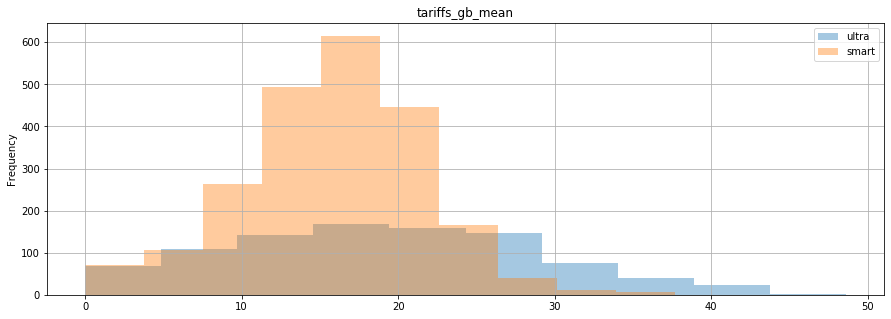

In [61]:
# dictionary of two rates and average Internet traffic per month
tariffs_gb_mean = [{"name": "internet traffic", "table":tariff_ultra_gb_mean},
                    {"name": "internet traffic", "table":tariff_smart_gb_mean}]
# chart for two rates and average Internet traffic per month
for element in tariffs_gb_mean:
    element['table'].plot(grid=True,figsize=(15,5),title='tariffs_gb_mean',kind='hist',alpha=0.4)
    plt.legend(['ultra','smart'])

The data for subscribers in both tariffs is generally evenly distributed. At the same time, almost half of the graph for "Smart" tariff subscribers is outside the established limit for Internet traffic - 15gb. It should be noted that "Ultra" tariff subscribers are also characterized by partial exceeding of the limit for this service. Thus it is possible to draw a conclusion about growing popularity of the given service among subscribers of cellular operators. 

Overall, the number of Smart subscribers is significantly higher than the number of Ultra subscribers, which is primarily due to the higher affordability of the Smart tariff. Ultra subscribers exceed limits set by the tariff plan much less frequently, which means they are already quite profitable for the company. However, due to the significant difference in pricing policy, the demand for this tariff is limited (the size of the target segment is limited), and marketing costs may not be reasonable. At the same time, "Smart" tariff subscribers almost always exceed the established limits and thus provide additional revenue for the company.

# Hypothesis testing

In [62]:
# the average value of payment for the "Ultra" tariff
tariff_ultra_total_income_mean = tariff_ultra['total_income'].mean()
# standard deviation of payment for the Ultra tariff
tariff_ultra_total_income_std = tariff_ultra['total_income'].std()
# The Three Sigma Rule!!!
tariff_ultra_total_income_mean_bottom_line = tariff_ultra_total_income_mean - tariff_ultra_total_income_std*3
tariff_ultra_total_income_mean_top_line = tariff_ultra_total_income_mean + tariff_ultra_total_income_std*3
print('Interval for the Ultra tariff: {:.1f}'.format(tariff_ultra_total_income_mean_bottom_line),'- {:.1f}'
      .format(tariff_ultra_total_income_mean_top_line))

Интервал по тарифу "Ультра": 981.8 - 3142.0


In [63]:
# the average payment for the "Smart" tariff
tariff_smart_total_income_mean = tariff_smart['total_income'].mean()
# standard deviation of Smart fare
tariff_smart_total_income_std = tariff_smart['total_income'].std()
# The Three Sigma Rule!!!
tariff_smart_total_income_mean_bottom_line = tariff_smart_total_income_mean - tariff_smart_total_income_std*3
tariff_smart_total_income_mean_top_line = tariff_smart_total_income_mean + tariff_smart_total_income_std*3
print('Interval at the "Smart" tariff: {:.1f}'.format(tariff_smart_total_income_mean_bottom_line),'- {:.1f}'
      .format(tariff_smart_total_income_mean_top_line))

Интервал по тарифу "Смарт": -1131.2 - 3599.5


In [64]:
# sampling interval according to the three sigma rule for the "Ultra" tariff. The minimum value cannot be less than the value specified in the tariff
tariff_ultra_interval = tariff_ultra.query('total_income >= 1950 and total_income <= 3142')
# sampling interval according to the three sigma rule for the "Smart" tariff. The minimum value cannot be less than the one specified in the tariff
tariff_smart_interval = tariff_smart.query('total_income >= 550 and total_income <= 3600')
# search for the average value over a given interval in the "Ultra" tariff to test the hypothesis for the "Smart" tariff
print(tariff_ultra_interval['total_income'].mean())
optimal_value = 2003
# let's set the commonly used threshold value of 5%
alpha = .05
results = st.ttest_1samp(tariff_smart_interval['total_income'], optimal_value) 
print('p-value: ', results.pvalue)
if (results.pvalue < alpha) :
    print("Rejecting the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

2002.7883771929824
p-значение:  0.0
Отвергаем нулевую гипотезу


Let's form the null hypothesis: - "The average revenue of Ultra and Smart tariff users differs". Then an alternative hypothesis would be: - "The average revenue of Ultra and Smart tariff users does not differ". To do this, we will take as a criterion the average revenue figure for the "Ultra" tariff and compare it to the average figure for the "Smart" tariff. For a more accurate sample, we will use the three sigma rule, and cut off the outliers. Let's set the commonly accepted threshold value at 5%. As we see the p-value is zero, which rejects our null hypothesis. We accept in this case the alternative hypothesis that the average revenue per tariff does not differ

In [65]:
# sampling of all clients in Moscow only
moscow_users = result.query('city == "Москва"')
# the average payment in Moscow
moscow_users_total_income_mean = moscow_users['total_income'].mean()
# standard deviation of payment for Moscow
moscow_users_total_income_std = moscow_users['total_income'].std()
# The Three Sigma Rule!!!
moscow_users_total_income_mean_bottom_line = moscow_users_total_income_mean - moscow_users_total_income_std*3
moscow_users_total_income_mean_top_line = moscow_users_total_income_mean + moscow_users_total_income_std*3
print('Interval: {:.1f}'.format(moscow_users_total_income_mean_bottom_line),'- {:.1f}'
      .format(moscow_users_total_income_mean_top_line))

Интервал: -713.9 - 3726.6


In [66]:
# sampling of all clients by country, except for Moscow
country_users = result.query('city != "Москва"')
# the average payment of all customers in the country, excluding Moscow
country_users_total_income_mean = country_users['total_income'].mean()
# standard deviation of payment for all customers in the country, except for Moscow
country_users_total_income_std = country_users['total_income'].std()
# The Three Sigma Rule!!!
country_users_total_income_mean_bottom_line = country_users_total_income_mean - country_users_total_income_std*3
country_users_total_income_mean_top_line = country_users_total_income_mean + country_users_total_income_std*3
print('Interval: {:.1f}'.format(country_users_total_income_mean_bottom_line),'- {:.1f}'
      .format(country_users_total_income_mean_top_line))

Интервал: -895.2 - 3865.5


In [68]:
# sampling interval according to the three sigma rule for Moscow. The minimum value cannot be less than the one specified in the tariff
moscow_users_interval = moscow_users.query('total_income >= 550 and total_income <= 3727')
# sampling interval according to the three sigma rule for the whole country, except for Moscow. The minimum value cannot be less than that specified in the tariff
country_users_interval = country_users.query('total_income >= 550 and total_income <= 3866')
# search for the mean value for a given interval in Moscow to test the hypothesis for the whole country except for Moscow
print(moscow_users_interval['total_income'].mean())
optimal_value = 1488
# let's set the commonly used threshold value of 5%
alpha = .05
results = st.ttest_1samp(country_users_interval['total_income'], optimal_value) 
print('p-value: ', results.pvalue)
if (results.pvalue < alpha) :
    print("Rejecting the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

1488.2739273927393
p-значение:  0.03148931871414501
Отвергаем нулевую гипотезу


Let's form the null hypothesis: - "The average revenue of users from Moscow differs from the revenue of users from other regions". Then the alternative hypothesis will be: "The average revenue of users from Moscow does not differ from the revenue of users from other regions". To do this we will take the average revenue indicator for Moscow as a criterion and compare it to the average indicator for other regions. For more accurate sampling we will use the three sigma rule, and cut off the dislodged indicators. Let's set the generally accepted threshold value of 5%. As we can see the p-value is 3.2%, which is below the threshold. This rejects our null hypothesis. We accept the alternative hypothesis in this case, that the average revenue in Moscow does not differ from the average revenue in the regions.

# General Conclusion

We did a preliminary analysis of tariffs on a small sample of customers. We have at our disposal data from 500 "Megaline" users for 2018. Customers are offered two tariff plans: "Smart" and "Ultra". Comparing the average figures for the two tariffs, we can conclude that the average duration of calls per month does not exceed the limited conditions of the tariff. For example in Ultra tariff average duration of calls is 548 minutes, but the limit is 3000. In "Smart" - 419 minutes at 500 minutes per month limit. However, it is worth noting the extremely high standard deviation (306 and 189), which indicates a high dispersion of random values relative to the mathematical expectation in both tariffs. 
As for the average messages sent per month, the spread is also high in relation to the amount of service used (44 messages in Ultra and 27 messages in Smart), while the average value is much lower than the declared limit. In the Ultra tariff it is 61 messages per month with a limit of 1,000 messages, in the Smart tariff it is 39 messages with a limit of 50. We see the unpopularity of using this option among the customers As for Internet traffic, there is an important observation. 
The average amount of Internet traffic per month is slightly higher than the established limit (15.9 gb within a 15 gb limit), with a standard deviation of 5.7 gb. We can conclude that customers almost always exceed the limit of traffic per month, and pay more than the limit, which brings additional revenue for this tariff. In the Ultra tariff the average traffic is 19.2 gb with a limit of 30 gb, and the standard deviation is 9.8 gb. There is a high monthly limit here, so as a rule, there is no extra revenue within the Ultra tariff for this service.
The pricing policy of the tariffs suggests that the "Smart" tariff is more popular. However, users of this tariff considerably more often exceed the limits set by the tariff, than provide additional revenues to the mobile operator. At the same time, Ultra tariff users almost never exceed the set tariffs, which means that the price for this tariff already includes an additional benefit. However, increasing the number of subscribers to this tariff is quite difficult because demand is limited. 
Having formed and tested the null hypotheses: "The average revenue of Ultra and Smart tariff users differs" and "The average revenue of users from Moscow differs from users from other regions", we did not receive their confirmation, which means that there is no difference in average revenue, both among tariffs and by region.
Of all of the above, we recommend focusing on the "Smart" tariff, as we see quite frequent exceeding of the limits, bringing in additional funds, while the average revenue does not differ from the "Ultra" tariff. And also the monthly increase in average revenue among all indicators during the year.